In [1]:
%matplotlib inline
import numpy as np
import argparse
import matplotlib.pyplot as plt
from os import mkdir
from time import sleep
import time
import datetime
import scipy.signal as sig
import scipy.integrate as integrate

# SS 304 Heat Load

In [2]:
# coefficients for SUS304 from http://cryogenics.nist.gov/Papers/Cryo_Materials.pdf
a=-1.4087
b=1.3982
c=0.2543
d=-.626
e=.2334
f=.4256
g=-.4658
h=.1650
i=-0.0199

In [3]:
# define the thermal conductivity
def logk(T,a,b,c,d,e,f,g,h,i):
    logT=np.log10(T)
    return a+b*logT+c*logT**2+d*logT**3+e*logT**4+f*logT**5 + g*logT**6 + h*logT**7 + i*logT**8
def kappa(T,a,b,c,d,e,f,g,h,i):
    return 10**logk(T,a,b,c,d,e,f,g,h,i)


(4, 300)

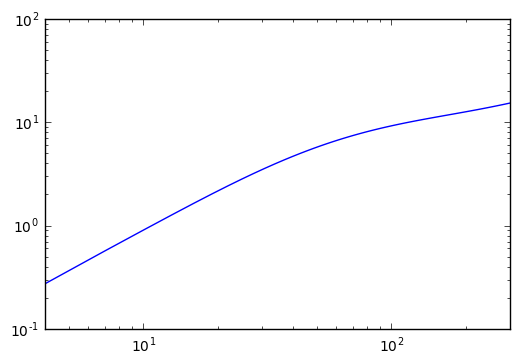

In [4]:
# Confirm that the resulting thermal conductivity looks like the Figure 1 in the paper
x=np.linspace(4,300,100)
y=logk(x,a,b,c,d,e,f,g,h,i)
plt.loglog(x,10**y)
plt.xlim(4,300)

In [25]:
# define the power equation.  Returns in W
def power(area,length,T1,T2):
    geo=area/length
    I=integrate.quad(kappa,T1,T2,args=(a,b,c,d,e,f,g,h,i))
    return I[0]*geo

In [27]:
# do the test case of 10 cm long cable from 4-20K.  pretty close to quoted 65 uW/K
Area=6.3e-6
Len=.1
power(Area,Len,4,20)/(20-4)*1e6

73.60674845073974

In [28]:
# and the test case for 4-100 K.  This one is a bit off from the quoted 196
T1=4
T2=100
power(Area,Len,4,100)/(T2-T1)*1e6


343.90320437657505

In [31]:
# for our 50K - 300K cables:
power(Area,Len,50,300)

0.18213239951412274

In [32]:
# and for the 4K - 50K calbes:
power(Area,Len,4,50)

0.008810746220069252

In [61]:
# and for the 4K- 50 cables in the ADR:
power(Area,.254,4,50)

0.0034687977244367138

# CuNi Heat load

In [52]:
# define the thermal conductivity and the heat load
def kcuni(T):
    return 300e-4*(T**(1.1))
def pcuni(Area, Len, T1, T2):
    geo= Area/Len
    I = integrate.quad(kcuni,T1,T2)
    return I[0]*geo

In [55]:
# for 350 mK to 4K
Acuni = 1.08e-6
Lcuni = .3
pcuni(Acuni,Lcuni,.35,4)

9.395425010125965e-07

In [56]:
# for 250 mK to 4K
pcuni(Acuni,.15,.25,.35)

5.747894291600864e-09

In [60]:
# for 1K to 4K
pcuni(Acuni,.3,.3,4)

9.411111023863854e-07

In [59]:
# for 100 mK to 1K
pcuni(Acuni,.15,.1,.3)

7.390064695230141e-09

# Thermal expansion of the SS compared to G10

In [ ]:
a=-2.95545e2
b=-3.9811e-1
c=9.2683e-3
d=-2.0261e-5
e=1.7127e-8
def Lrat(T,a,b,c,d,e):
    return (a+b*T+c*T**2+d*T**3+e*T**4)*1e-5
